In [111]:
import mne

In [112]:
import os

In [113]:
path = "eeg-motor-movementimagery-dataset-1.0.0/files/"

In [114]:
subjects = os.listdir(path)
print(subjects)

['64_channel_sharbrough-old.png', '64_channel_sharbrough.pdf', '64_channel_sharbrough.png', 'ANNOTATORS', 'RECORDS', 'S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010', 'S011', 'S012', 'S013', 'S014', 'S015', 'S016', 'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S023', 'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030', 'S031', 'S032', 'S033', 'S034', 'S035', 'S036', 'S037', 'S038', 'S039', 'S040', 'S041', 'S042', 'S043', 'S044', 'S045', 'S046', 'S047', 'S048', 'S049', 'S050', 'S051', 'S052', 'S053', 'S054', 'S055', 'S056', 'S057', 'S058', 'S059', 'S060', 'S061', 'S062', 'S063', 'S064', 'S065', 'S066', 'S067', 'S068', 'S069', 'S070', 'S071', 'S072', 'S073', 'S074', 'S075', 'S076', 'S077', 'S078', 'S079', 'S080', 'S081', 'S082', 'S083', 'S084', 'S085', 'S086', 'S087', 'S088', 'S089', 'S090', 'S091', 'S092', 'S093', 'S094', 'S095', 'S096', 'S097', 'S098', 'S099', 'S100', 'S101', 'S102', 'S103', 'S104', 'S105', 'S106', 'S107', 'S108', 'S109', 'SHA256SUMS

In [122]:
#Example subject
subject_id = "S002" 
edf_file = os.path.join(path, subject_id, f"{subject_id}R04.edf")
raw = mne.io.read_raw_edf(edf_file, preload=True)


Extracting EDF parameters from C:\Users\vmana\Downloads\eeg-motor-movementimagery-dataset-1.0.0\files\S002\S002R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...


In [123]:
from pyedflib import highlevel
signals, signal_headers, header = highlevel.read_edf(edf_file)

In [124]:
os.path.exists(edf_file)


True

In [125]:
print(raw.info['ch_names'])


['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


In [126]:
print(raw.info['bads'])


[]


raw data information <Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>


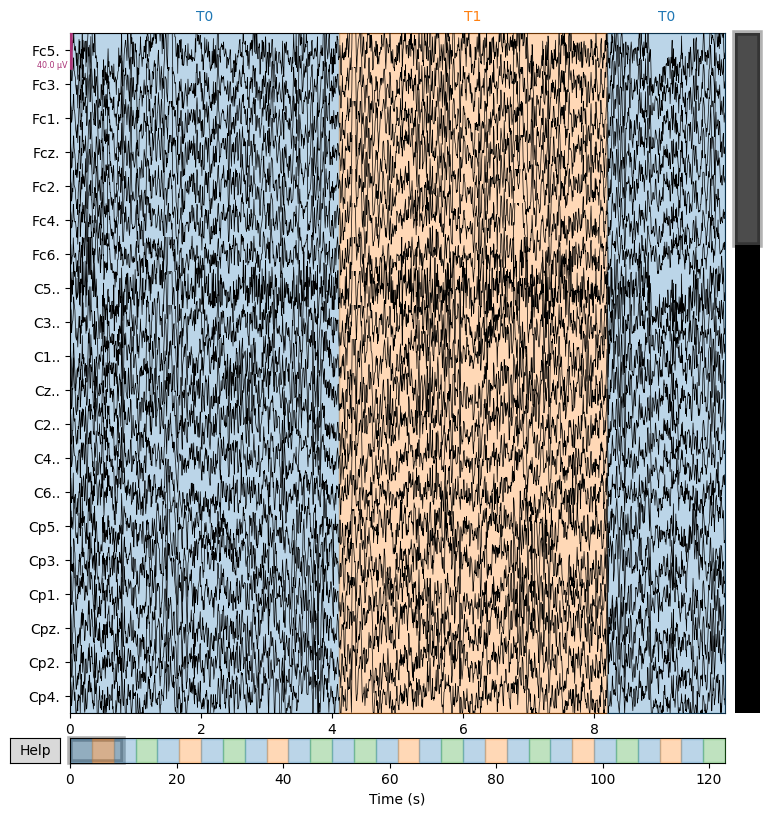

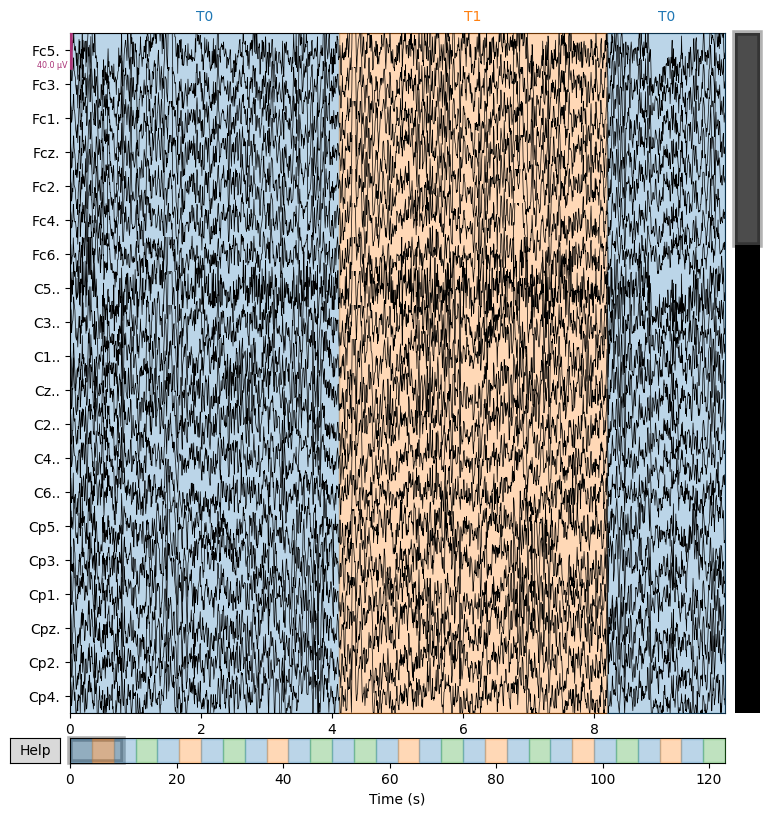

In [127]:
print("raw data information", raw.info)
# raw_data.plot()
raw.plot()       # Plot raw EEG


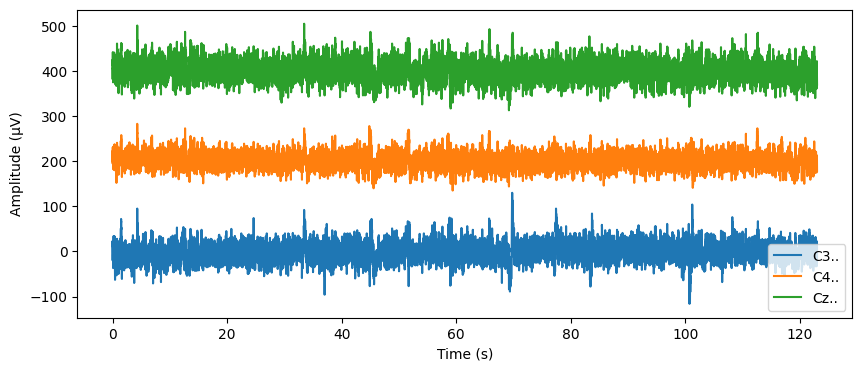

In [130]:
import matplotlib.pyplot as plt

# C3, C4 and Cz are present on motor cortex. 
picks = mne.pick_channels(raw.info['ch_names'], include=['C3..', 'C4..', 'Cz..'])

# Get the data
data, times = raw[picks, :]

# Plot manually
plt.figure(figsize=(10, 4))
for i, ch_data in enumerate(data):
    plt.plot(times, ch_data * 1e6 + i * 200, label=raw.info['ch_names'][picks[i]])  # μV
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.show()


In [131]:
eeg_picks = mne.pick_types(raw.info, eeg=True)  # picks all EEG channels


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)

Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
Unique event IDs: {np.int64(1), np.int64(2), np.int64(3)}
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 161 original time points ...
    Rejecting  epoch based on EEG : ['Fp1.', 'Fpz.', 'Fp2.', 'Af7.'

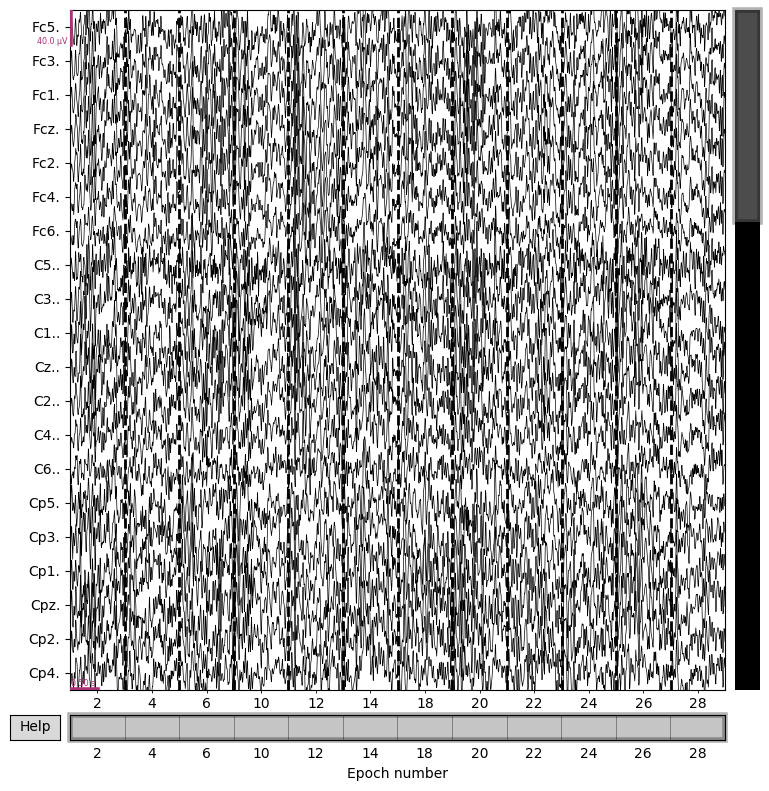

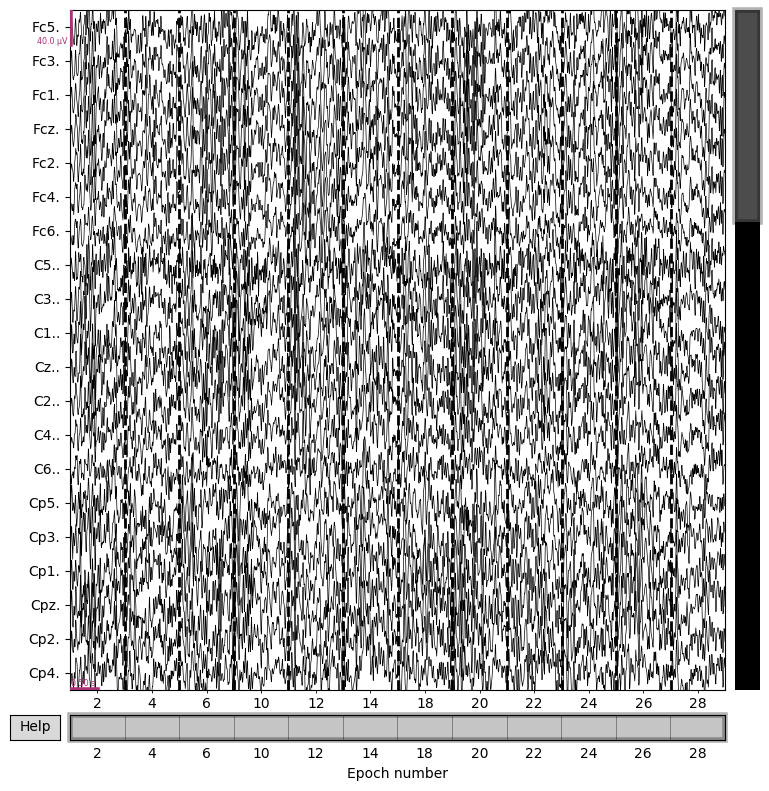

In [134]:
# 3. Apply a bandpass filter (e.g., 1-40 Hz) to clean data
raw.filter(1., 40., fir_design='firwin')
events, event_id = mne.events_from_annotations(raw)

# 4. Define picks to include all EEG channels (exclude bads automatically)
eeg_picks = mne.pick_types(raw.info, eeg=True, exclude='bads')

# 5. Check your events and event IDs
print(f"Unique event IDs: {set(events[:, 2])}")

# 6. Create epochs around event ID 1 (change if your event is different)
reject_criteria = dict(eeg=200e-6)  # 200 µV rejection threshold
flat_criteria = dict(eeg=1e-6)      # flat signal threshold


epochs = mne.Epochs(raw, events, event_id=1, tmin=-0.2, tmax=0.8,
                    picks=eeg_picks, baseline=(None, 0),
                    reject=reject_criteria, flat=flat_criteria,
                    preload=True)

print(f"Number of epochs created: {len(epochs)}")

# 7. Visualize epochs to inspect data quality
epochs.plot()

In [135]:
raw.filter(1., 30., fir_design='firwin')



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 529 samples (3.306 s)



<RawEDF | S002R04.edf, 64 x 19680 (123.0 s), ~9.7 MiB, data loaded>

In [136]:
print(f"Raw data time: {raw.times[0]} to {raw.times[-1]} seconds")
print(f"Example event sample: {events[0, 0]}")  # sample index of first event
sfreq = raw.info['sfreq']
print(f"Event time in seconds: {events[0, 0] / sfreq}")


Raw data time: 0.0 to 122.99375 seconds
Example event sample: 0
Event time in seconds: 0.0


In [75]:
annotations = raw.annotations
print(annotations)


<Annotations | 30 segments: T0 (15), T1 (8), T2 (7)>


Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]


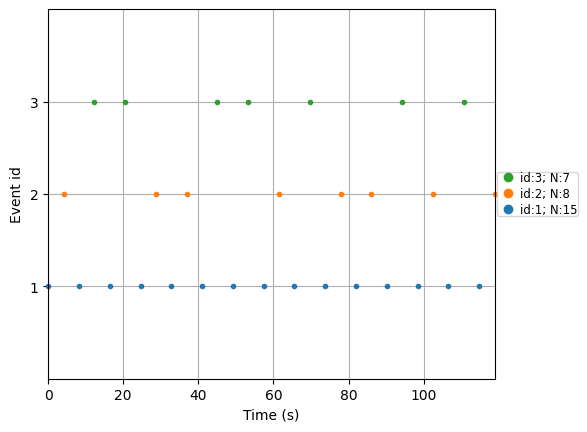

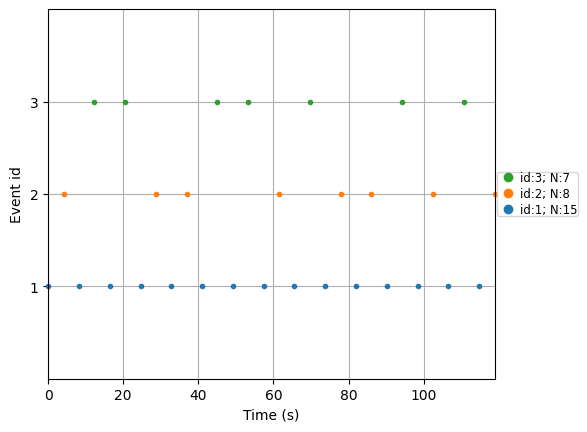

In [76]:
events, event_id = mne.events_from_annotations(raw)
mne.viz.plot_events(events, sfreq=raw.info['sfreq'])


In [137]:
raw.filter(1., 40.)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)



<RawEDF | S002R04.edf, 64 x 19680 (123.0 s), ~9.7 MiB, data loaded>

In [138]:
raw.set_eeg_reference('average')


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | S002R04.edf, 64 x 19680 (123.0 s), ~9.7 MiB, data loaded>

Not setting metadata
30 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 161 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 20 events and 161 original time points ...


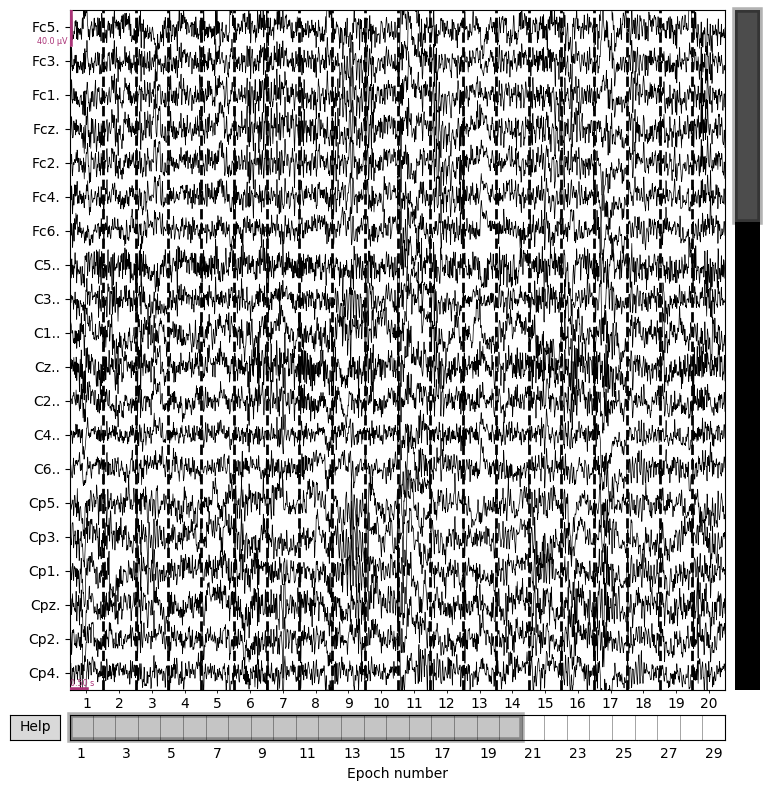

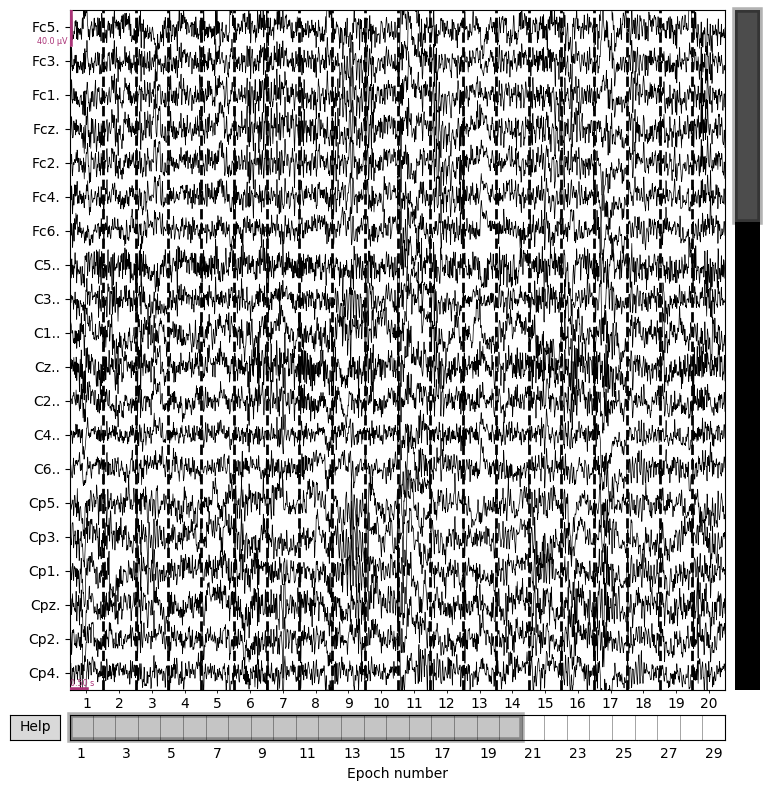

In [139]:
epochs = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.8, baseline=(None, 0))
epochs.plot()


Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\vmana\AppData\Local\Temp\ipykernel_2940\2697875309.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd.plot()
C:\Users\vmana\anaconda3\envs\eeg_env\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


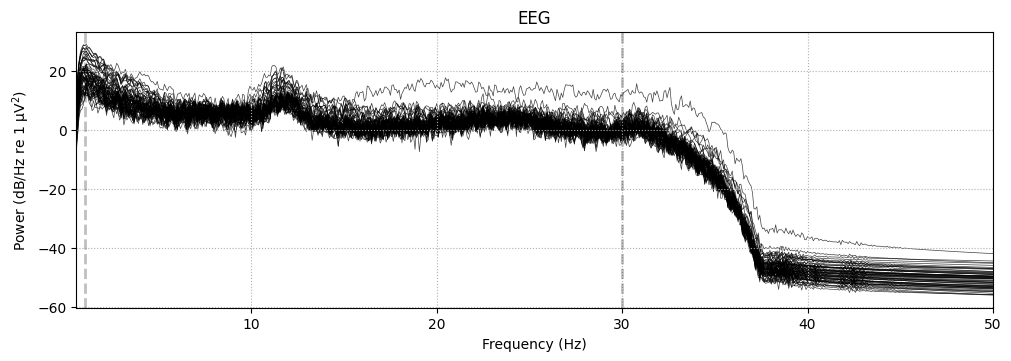

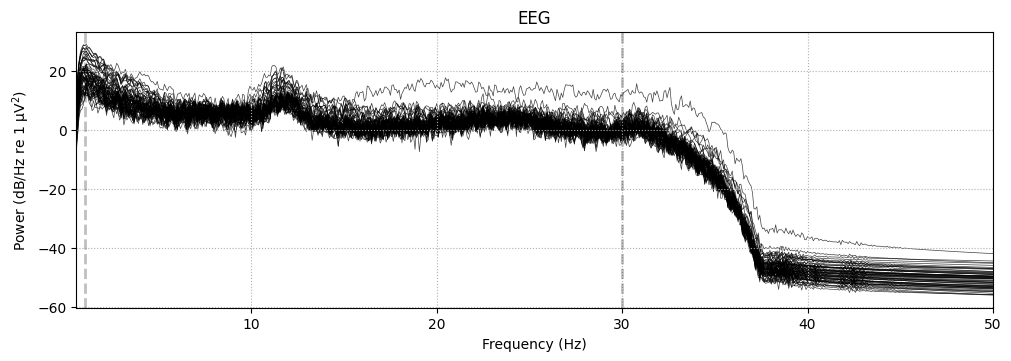

In [140]:
psd = raw.compute_psd(method='welch', fmin=0.5, fmax=50)
psd.plot()


In [141]:
epochs_data = epochs.get_data()  # Shape: trials × channels × timepoints


Using data from preloaded Raw for 29 events and 161 original time points ...


<Epochs | 29 events (all good), -0.2 – 0.8 s (baseline -0.2 – 0 s), ~65 KiB, data not loaded,
 np.str_('T0'): 14
 np.str_('T1'): 7
 np.str_('T2'): 8>
Using data from preloaded Raw for 20 events and 161 original time points ...


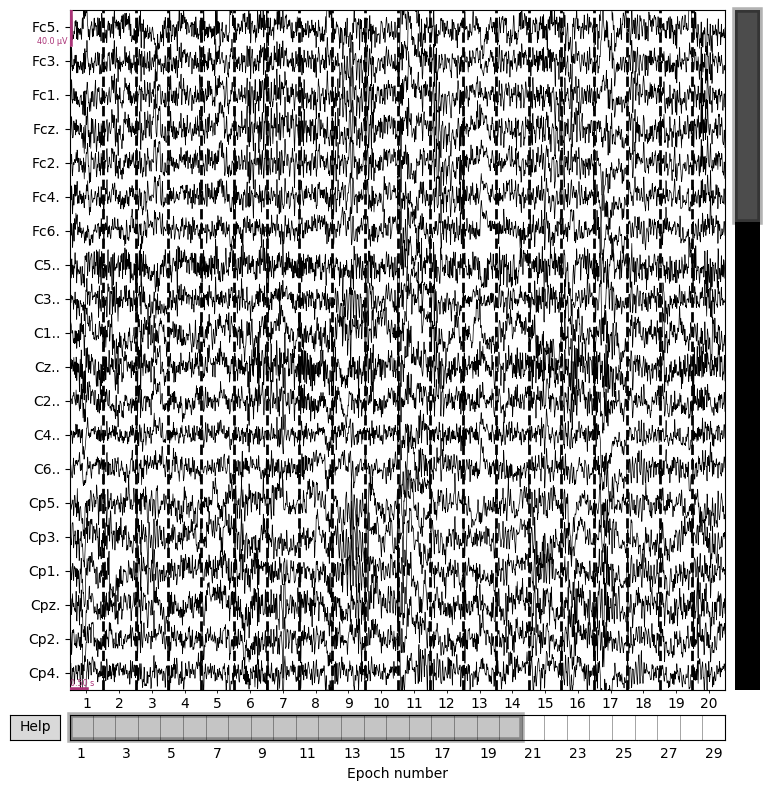

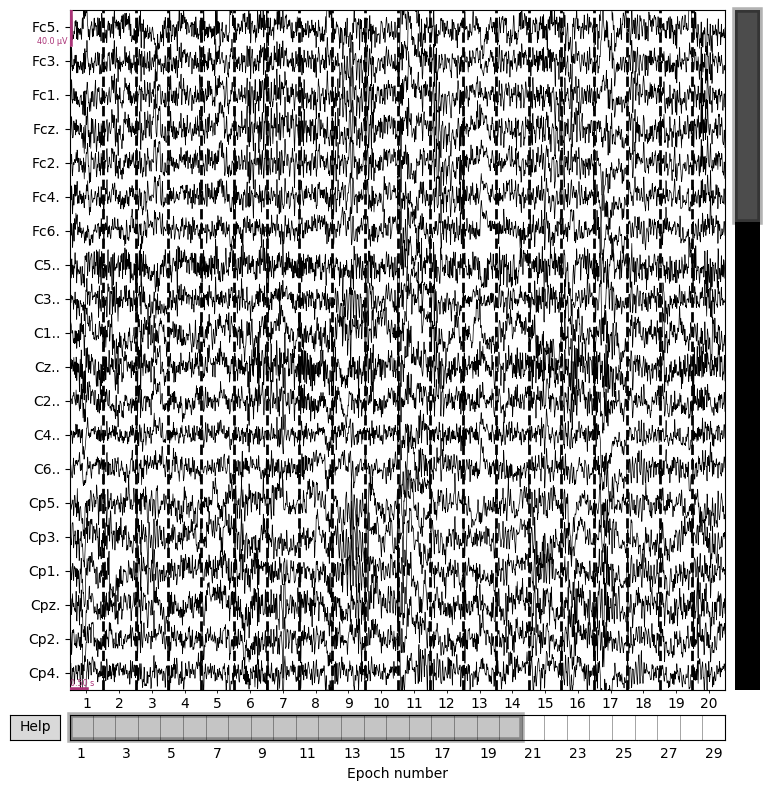

In [142]:
print(epochs)
epochs.plot()  # visualize all epochs


In [143]:
epochs.drop_bad()


In [144]:
n_times = epochs.get_data().shape[-1]  # Number of samples in an epoch
psds, freqs = mne.time_frequency.psd_array_welch(
    epochs.get_data(),
    sfreq=epochs.info['sfreq'],
    n_fft=n_times
)



Using data from preloaded Raw for 29 events and 161 original time points ...
Using data from preloaded Raw for 29 events and 161 original time points ...
Effective window size : 1.006 (s)


In [145]:
mapping = {ch: ch.replace('.', '').upper() for ch in raw.ch_names}
raw.rename_channels(mapping)

<RawEDF | S002R04.edf, 64 x 19680 (123.0 s), ~9.7 MiB, data loaded>

In [146]:
montage = mne.channels.make_standard_montage('standard_1005')


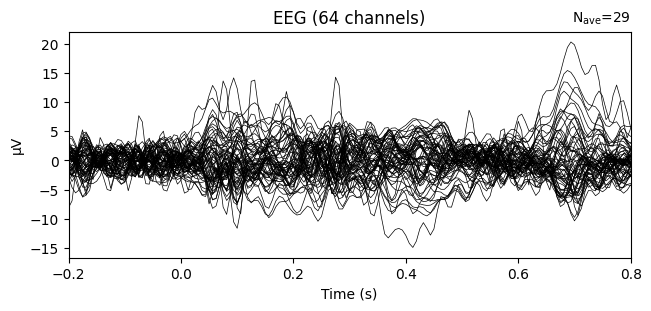

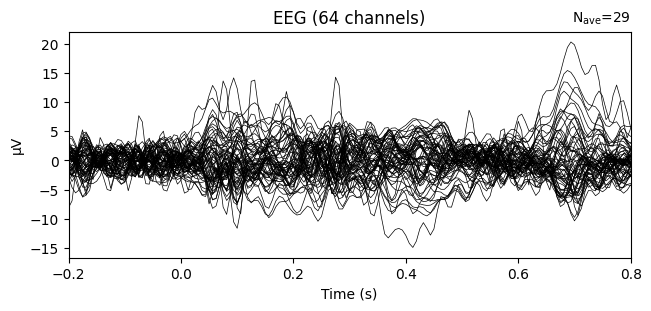

In [147]:
evoked = epochs.average()
evoked.plot()


In [148]:
import numpy as np
X = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
y = epochs.events[:, -1]  # labels from event IDs
np.save("epochs_data.npy", X)
np.save("labels.npy", y)


Using data from preloaded Raw for 29 events and 161 original time points ...


In [149]:
from sklearn.preprocessing import StandardScaler

n_epochs, n_channels, n_times = X.shape
X_2d = X.reshape(n_epochs, n_channels * n_times)



In [150]:
import numpy as np

def bandpower(data, sf, band):
    from scipy.signal import welch
    fmin, fmax = band
    psd, freqs = welch(data, sf)
    freq_res = freqs[1] - freqs[0]
    idx_band = np.logical_and(freqs >= fmin, freqs <= fmax)
    return np.sum(psd[idx_band]) * freq_res

sfreq = epochs.info['sfreq']
bands = {'theta': (4, 7), 'alpha': (8, 12), 'beta': (13, 30)}

features = []
for epoch in X:
    epoch_features = []
    for ch_data in epoch:
        for band in bands.values():
            epoch_features.append(bandpower(ch_data, sfreq, band))
    features.append(epoch_features)

X_features = np.array(features)  # shape: (n_epochs, n_channels * n_bands)


C:\Users\vmana\anaconda3\envs\eeg_env\lib\site-packages\scipy\signal\_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 161, using nperseg = 161
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Extracting EDF parameters from C:\Users\vmana\Downloads\eeg-motor-movementimagery-dataset-1.0.0\files\S002\S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Original channels: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
Renamed channels: ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 

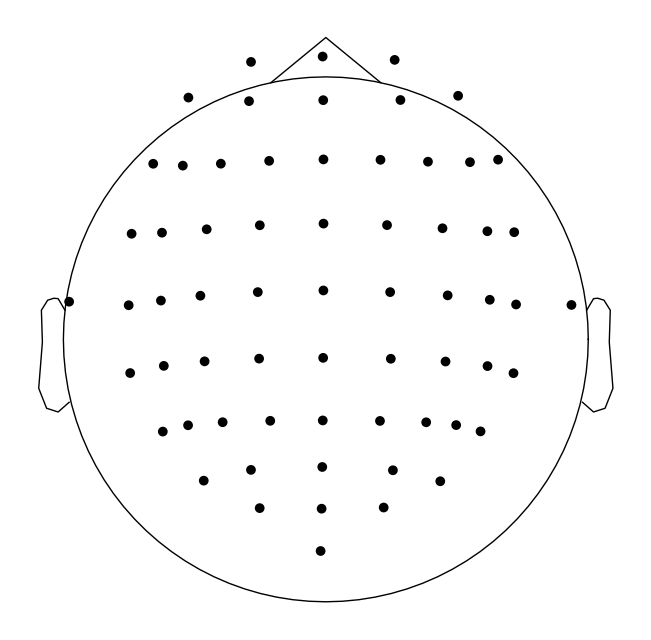

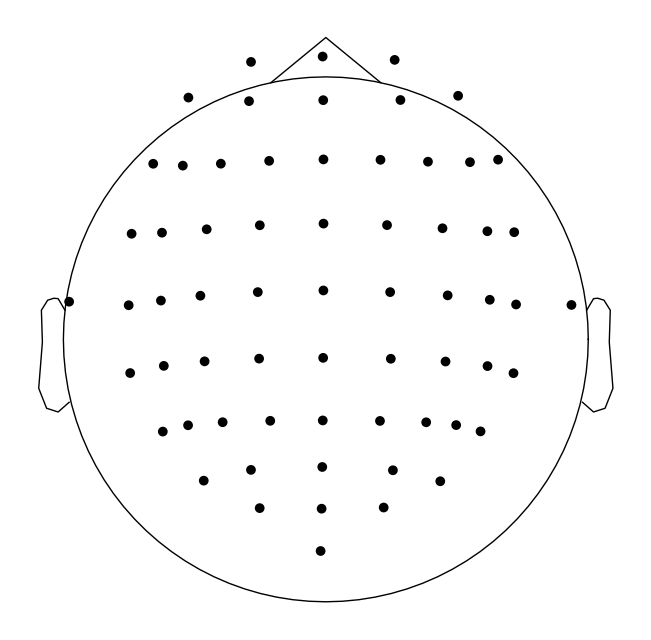

In [163]:
subject_id = "S002"  # Example subject
edf_file = os.path.join(path, subject_id, f"{subject_id}R01.edf")

raw = mne.io.read_raw_edf(edf_file, preload=True)
print("Original channels:", raw.ch_names)

def custom_rename(ch_name):
    # Strip trailing dots
    ch = ch_name.rstrip('.').upper()
    
    # Fix 'Z' endings to lowercase 'z' for specific channels
    if ch in ['FCZ', 'CZ', 'CPZ', 'FPZ', 'AFZ', 'FZ', 'PZ', 'POZ', 'OZ', 'IZ']:
        ch = ch[:-1] + 'z'
    
    # Fix the 'P' in FP1, FP2, FPZ to lowercase 'p'
    if ch.startswith('FP'):
        # For 'FP1' and 'FP2', replace second char with lowercase p
        # For 'FPZ', handled above, but keep consistent
        ch = 'Fp' + ch[2:]
    
    return ch

new_names = {ch: custom_rename(ch) for ch in raw.ch_names}
raw.rename_channels(new_names)
print("Renamed channels:", raw.ch_names)


montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)

raw.plot_sensors(kind='topomap')  # optional check


In [164]:
import mne
import numpy as np
import os

# Define event code mapping based on your dataset description
event_id = {
    'rest': 0,    # T0
    'left': 1,    # T1: left fist / both fists (depending on run)
    'right': 2    # T2: right fist / both feet (depending on run)
}

def custom_rename(ch_name):
    # Strip trailing dots and uppercase
    ch = ch_name.rstrip('.').upper()
    
    # Fix 'Z' endings to lowercase 'z' for specific channels
    if ch in ['FCZ', 'CZ', 'CPZ', 'FPZ', 'AFZ', 'FZ', 'PZ', 'POZ', 'OZ', 'IZ']:
        ch = ch[:-1] + 'z'
    
    # Fix the 'P' in FP1, FP2, FPZ to lowercase 'p'
    if ch.startswith('FP'):
        ch = 'Fp' + ch[2:]
    
    return ch

# Function to load one run and extract epochs & labels
def process_run(edf_path, task_type):
    raw = mne.io.read_raw_edf(edf_path, preload=True)
    print(f"Original channels in {os.path.basename(edf_path)}:", raw.ch_names)
    
    # Rename channels using your custom function
    new_names = {ch: custom_rename(ch) for ch in raw.ch_names}
    raw.rename_channels(new_names)
    print(f"Renamed channels in {os.path.basename(edf_path)}:", raw.ch_names)
    
    # Set montage after renaming channels
    montage = mne.channels.make_standard_montage('standard_1005')
    raw.set_montage(montage)
    
    # Extract events from annotations
    events, _ = mne.events_from_annotations(raw, event_id={'T0':0, 'T1':1, 'T2':2})
    
    # Extract epochs around events (e.g., -0.2 to 0.8s)
    epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8, baseline=(None, 0), preload=True)
    print("Epochs : ", epochs)
    
    X = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
    y = epochs.events[:, 2]  # event code labels per epoch
    
    return X, y, epochs, raw

# Define your base data directory
data_dir = 'eeg-motor-movementimagery-dataset-1.0.0/files/'

# Initialize containers for all subjects
all_X = []
all_epochs=[]
all_raw=[]
all_y = []
subj_id= 1
subj_folder = os.path.join(data_dir, f'S{subj_id:03d}')
    
for run_num in range(1, 14):  # 14 runs per subject
    edf_file = os.path.join(subj_folder, f'S{subj_id:03d}R{run_num:02d}.edf')
    
    # Determine task type based on run number (simplified example)
    if run_num in [1, 2]:
        task = 'baseline'
    elif run_num in [3, 4, 7, 8, 11, 12]:
        task = 'fist'  # left/right fist runs
    elif run_num in [5, 6, 9, 10, 13, 14]:
        task = 'fist_feet'  # both fists / both feet runs
    else:
        task = 'unknown'
    
    try:
        X_run, y_run, epochs,raw = process_run(edf_file, task)
        all_X.append(X_run)
        all_y.append(y_run)
        all_epochs.append(epochs)
        all_raw.append(raw)
    except Exception as e:
        print(f"Failed to process {edf_file}: {e}")


Extracting EDF parameters from C:\Users\vmana\Downloads\eeg-motor-movementimagery-dataset-1.0.0\files\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Original channels in S001R01.edf: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
Renamed channels in S001R01.edf: ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2'

In [165]:
print(all_raw)

[<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.9 MiB, data loaded>, <RawEDF | S001R04.edf, 64 x 20000 (125.0 s), ~9.9 MiB, data loaded>, <RawEDF | S001R05.edf, 64 x 20000 (125.0 s), ~9.9 MiB, data loaded>, <RawEDF | S001R06.edf, 64 x 20000 (125.0 s), ~9.9 MiB, data loaded>, <RawEDF | S001R07.edf, 64 x 20000 (125.0 s), ~9.9 MiB, data loaded>, <RawEDF | S001R08.edf, 64 x 20000 (125.0 s), ~9.9 MiB, data loaded>, <RawEDF | S001R09.edf, 64 x 20000 (125.0 s), ~9.9 MiB, data loaded>, <RawEDF | S001R10.edf, 64 x 20000 (125.0 s), ~9.9 MiB, data loaded>, <RawEDF | S001R11.edf, 64 x 20000 (125.0 s), ~9.9 MiB, data loaded>, <RawEDF | S001R12.edf, 64 x 20000 (125.0 s), ~9.9 MiB, data loaded>, <RawEDF | S001R13.edf, 64 x 20000 (125.0 s), ~9.9 MiB, data loaded>]


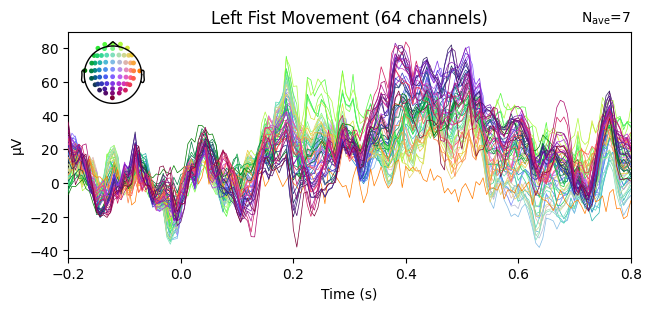

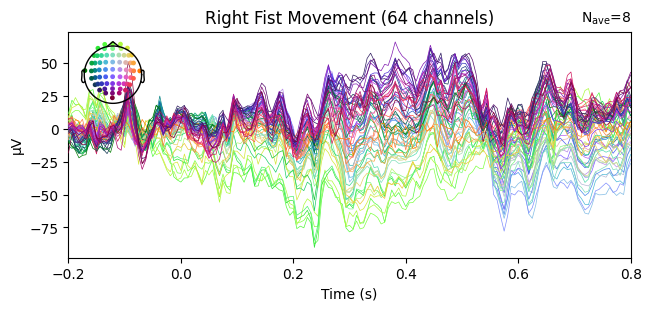

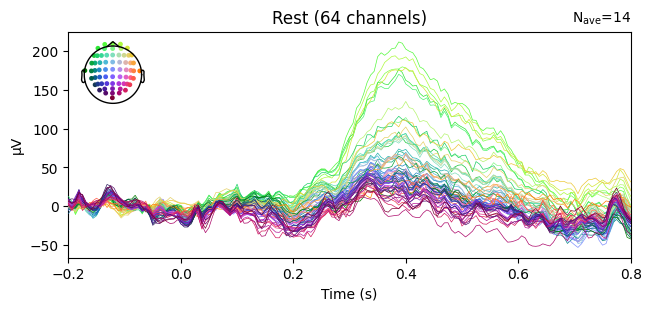

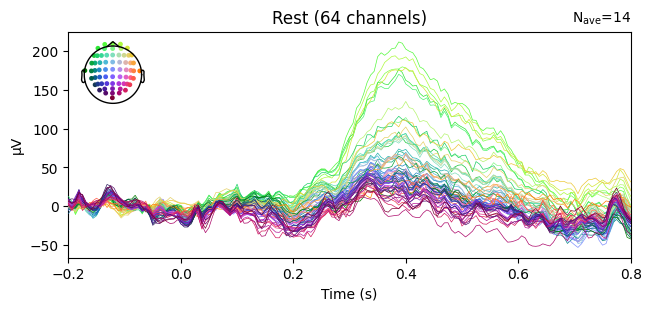

In [166]:
evoked_left = epochs['left'].average()
evoked_right = epochs['right'].average()
evoked_rest = epochs['rest'].average()

evoked_left.plot(spatial_colors=True, time_unit='s', titles='Left Fist Movement')
evoked_right.plot(spatial_colors=True, time_unit='s', titles='Right Fist Movement')
evoked_rest.plot(spatial_colors=True, time_unit='s', titles='Rest')


Left :


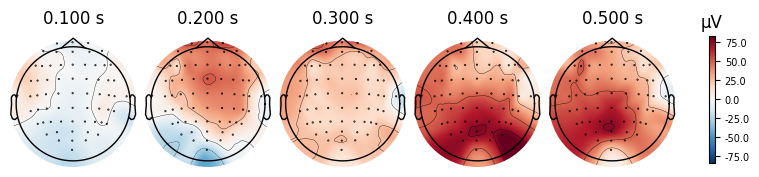

Right :


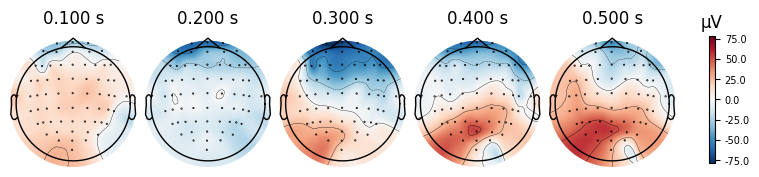

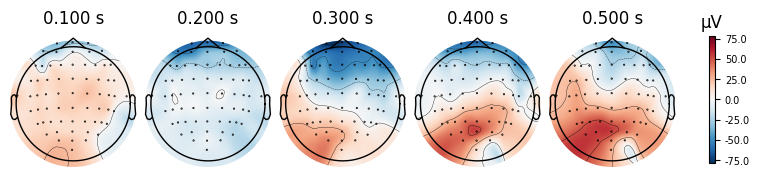

In [167]:
times = np.linspace(0.1, 0.5, 5)  # time points after stimulus (in seconds)
print("Left :" )
evoked_left.plot_topomap(times=times)
print("Right :" )
evoked_right.plot_topomap(times=times)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


C:\Users\vmana\anaconda3\envs\eeg_env\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\Users\vmana\anaconda3\envs\eeg_env\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


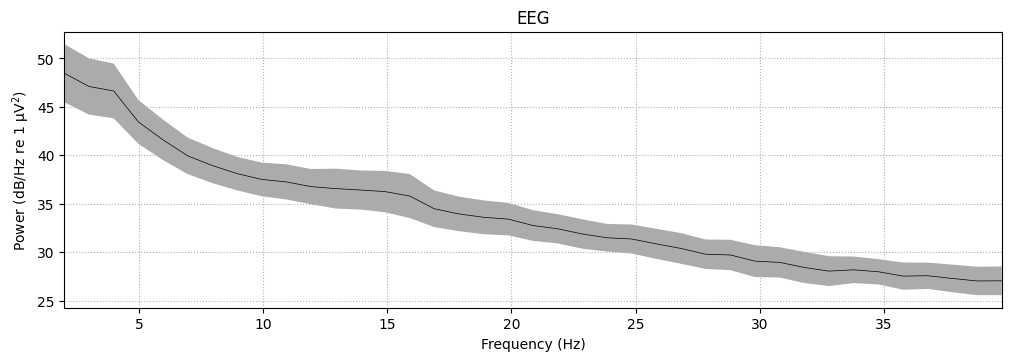

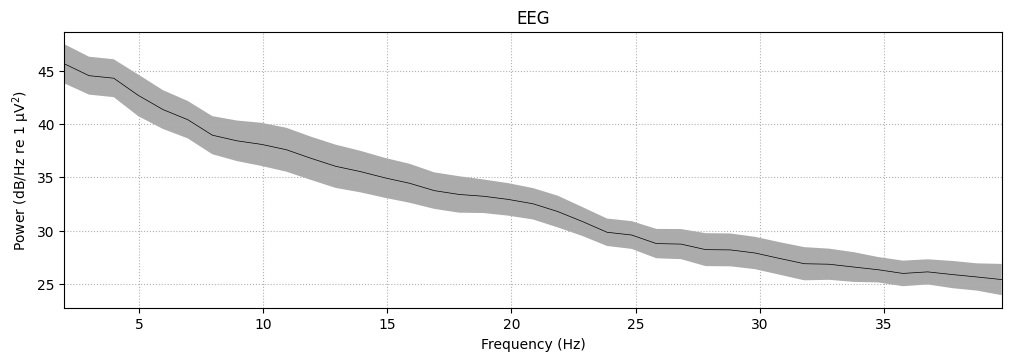

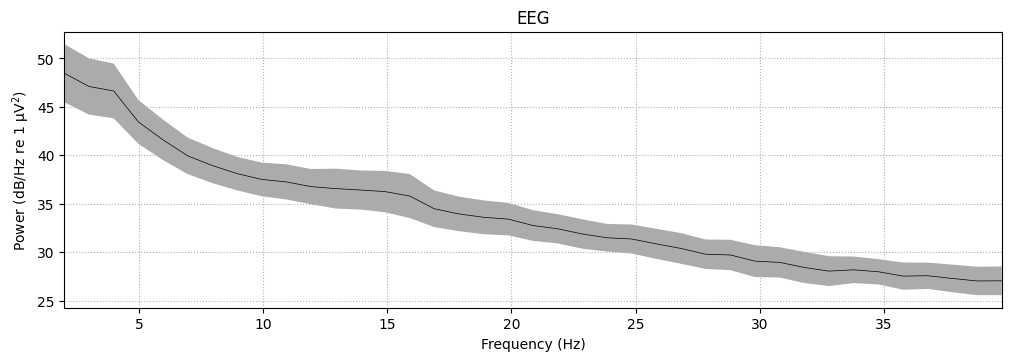

In [168]:
epochs['left'].plot_psd(fmin=1, fmax=40, average=True)
epochs['right'].plot_psd(fmin=1, fmax=40, average=True)


In [169]:
print(all_raw[0])

<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.9 MiB, data loaded>


In [180]:
import mne
import numpy as np
import os

# Define event code mapping based on your dataset description
event_id = {
    'rest': 0,    # T0
    'left': 1,    # T1: left fist / both fists (depending on run)
    'right': 2    # T2: right fist / both feet (depending on run)
}

def custom_rename(ch_name):
    # Strip trailing dots and uppercase
    ch = ch_name.rstrip('.').upper()
    
    # Fix 'Z' endings to lowercase 'z' for specific channels
    if ch in ['FCZ', 'CZ', 'CPZ', 'FPZ', 'AFZ', 'FZ', 'PZ', 'POZ', 'OZ', 'IZ']:
        ch = ch[:-1] + 'z'
    
    # Fix the 'P' in FP1, FP2, FPZ to lowercase 'p'
    if ch.startswith('FP'):
        ch = 'Fp' + ch[2:]
    
    return ch

# Function to load one run and extract epochs & labels
def process_run(edf_path, task_type):
    raw = mne.io.read_raw_edf(edf_path, preload=True)
    
    # Rename channels using your custom function
    new_names = {ch: custom_rename(ch) for ch in raw.ch_names}
    raw.rename_channels(new_names)
    
    # Set montage after renaming channels
    montage = mne.channels.make_standard_montage('standard_1005')
    raw.set_montage(montage)
    
    # Extract events from annotations
    events, _ = mne.events_from_annotations(raw, event_id={'T0':0, 'T1':1, 'T2':2})
    
    # Extract epochs around events (e.g., -0.2 to 0.8s)
    epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=0.8, baseline=(None, 0), preload=True)
    
    X = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
    y = epochs.events[:, 2]  # event code labels per epoch
    
    return X, y

# Define your base data directory
data_dir = 'eeg-motor-movementimagery-dataset-1.0.0/files/'

# Initialize containers for all subjects
all_X = []
all_y = []

for subj_id in range(1, 10):  # Subjects numbered 1 to 109
    subj_folder = os.path.join(data_dir, f'S{subj_id:03d}')
    
    for run_num in range(1, 14):  # 14 runs per subject
        edf_file = os.path.join(subj_folder, f'S{subj_id:03d}R{run_num:02d}.edf')
        
        # Determine task type based on run number (simplified example)
        if run_num in [1, 2]:
            task = 'baseline'
        elif run_num in [3, 4, 7, 8, 11, 12]:
            task = 'fist'  # left/right fist runs
        elif run_num in [5, 6, 9, 10, 13, 14]:
            task = 'fist_feet'  # both fists / both feet runs
        else:
            task = 'unknown'
        
        try:
            X_run, y_run = process_run(edf_file, task)
            all_X.append(X_run)
            all_y.append(y_run)
        except Exception as e:
            print(f"Failed to process {edf_file}: {e}")


Extracting EDF parameters from C:\Users\vmana\Downloads\eeg-motor-movementimagery-dataset-1.0.0\files\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Used Annotations descriptions: [np.str_('T0')]
Failed to process eeg-motor-movementimagery-dataset-1.0.0/files/S001\S001R01.edf: No matching events found for left (event id 1)
Extracting EDF parameters from C:\Users\vmana\Downloads\eeg-motor-movementimagery-dataset-1.0.0\files\S001\S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Used Annotations descriptions: [np.str_('T0')]
Failed to process eeg-motor-movementimagery-dataset-1.0.0/files/S001\S001R02.edf: No matching events found for left (event id 1)
Extracting EDF parameters from C:\Users\vmana\Downloads\eeg-motor-movementimagery-dataset-1.0.0\files\S001\S001R03.edf...
EDF fi

In [171]:
# Concatenate all epochs and labels
X = np.concatenate(all_X, axis=0)
y = np.concatenate(all_y, axis=0)

print("Final data shapes:", X.shape, y.shape)


Final data shapes: (2871, 64, 161) (2871,)


In [172]:
import numpy as np

# Normalize each epoch/channel individually (zero mean, unit variance)
X_norm = (X - X.mean(axis=2, keepdims=True)) / (X.std(axis=2, keepdims=True) + 1e-10)


In [173]:
import numpy as np

y = np.array(y)


In [174]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_encoded, test_size=0.2, random_state=42)


In [176]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = X_train.shape[1:]  # (n_channels, n_times)

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Reshape((input_shape[0], input_shape[1], 1)),  # add channel dim for Conv2D

    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_3 (Reshape)                  │ (None, 64, 161, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 161, 16)         │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 80, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 80, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 20480)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       1,310,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,315,779 (5.02 MB)

 Trainable params: 1,315,779 (5.02 MB)

 Non-trainable params: 0 (0.00 B)

In [177]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)


Epoch 1/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.4624 - loss: 1.0936 - val_accuracy: 0.5326 - val_loss: 0.9702
Epoch 2/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.5430 - loss: 0.9569 - val_accuracy: 0.5957 - val_loss: 0.8987
Epoch 3/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6008 - loss: 0.8620 - val_accuracy: 0.6457 - val_loss: 0.8101
Epoch 4/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6759 - loss: 0.7541 - val_accuracy: 0.6565 - val_loss: 0.7939
Epoch 5/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7010 - loss: 0.6789 - val_accuracy: 0.6739 - val_loss: 0.7610
Epoch 6/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7718 - loss: 0.5654 - val_accuracy: 0.6978 - val_loss: 0.7349
Epoch 7/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8083 - loss: 0.4565 - val_accuracy: 0.6804 - val_loss: 0.8442
Epoch 8/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8437 - loss: 0.3978 - val_accuracy: 0.7065 - v

In [178]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6835 - loss: 1.8018
Test accuracy: 0.683


In [179]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Concatenate all epochs and labels across subjects and runs
X = np.concatenate(all_X, axis=0)  # shape: (total_epochs, n_channels, n_times)
y = np.concatenate(all_y, axis=0)  # shape: (total_epochs,)

# Flatten epochs for ML (channels * timepoints as features)
n_epochs, n_channels, n_times = X.shape
X_flat = X.reshape(n_epochs, n_channels * n_times)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42, stratify=y)

# ----- Support Vector Machine -----
svm_clf = SVC(kernel='rbf', C=1, gamma='scale')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

print("SVM Classifier Results:")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

# ----- Random Forest -----
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


SVM Classifier Results:
              precision    recall  f1-score   support

           0       0.62      0.92      0.74       277
           1       0.75      0.42      0.53       149
           2       0.62      0.34      0.44       149

    accuracy                           0.64       575
   macro avg       0.66      0.56      0.57       575
weighted avg       0.65      0.64      0.61       575

Accuracy: 0.6365
Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72       277
           1       0.71      0.40      0.52       149
           2       0.61      0.31      0.41       149

    accuracy                           0.62       575
   macro avg       0.64      0.54      0.55       575
weighted avg       0.63      0.62      0.58       575

Accuracy: 0.6157
